# Домашнее задание 1

Labour Equation

In [11]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# stats models: regression fitting
import statsmodels.formula.api as smf
# data visualization
import seaborn as sns

Выгрузим Labour.csv и выведем размер датасета

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/Labour.csv')
df.shape

(569, 4)

Выведем первые 5 наблюдений

In [19]:
df.head()

,capital,labour,output,wage
0,2.606563,184,9.250759,43.080307
1,1.323237,91,3.664310,27.780016
2,22.093692,426,28.781516,44.467748
3,10.737851,72,4.124642,39.734710
4,1.161365,46,2.890150,34.650709


# Построим несколько гистограмм

<AxesSubplot:xlabel='output', ylabel='Count'>

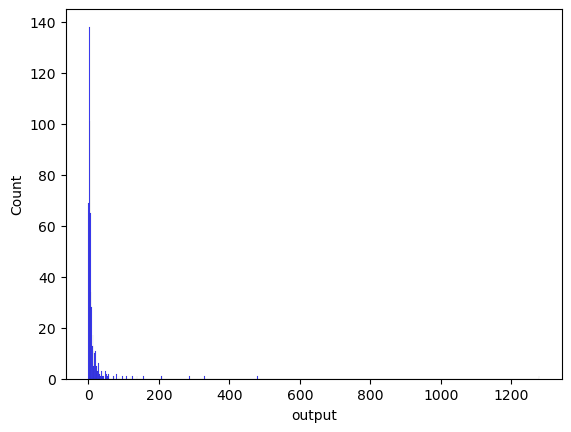

In [43]:
sns.histplot(data=df, x='output', color = "b")

<AxesSubplot:xlabel='output', ylabel='Count'>

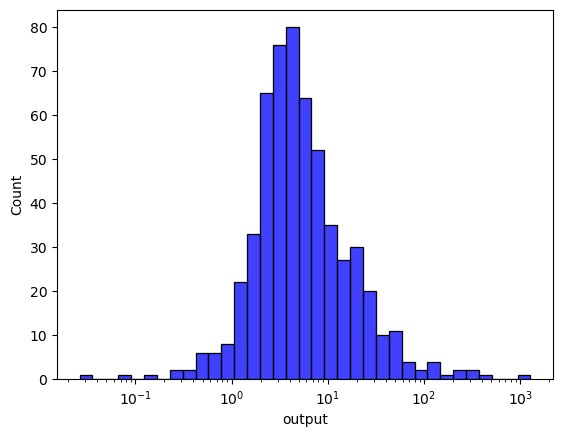

In [42]:
sns.histplot(data=df, x='output', log_scale=True, color = "b")

<AxesSubplot:xlabel='capital', ylabel='Count'>

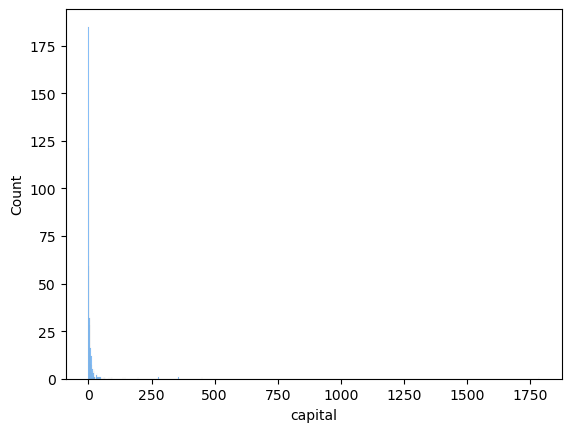

In [22]:
sns.histplot(data=df, x='capital', color = "#66B2FF")

<AxesSubplot:xlabel='capital', ylabel='Count'>

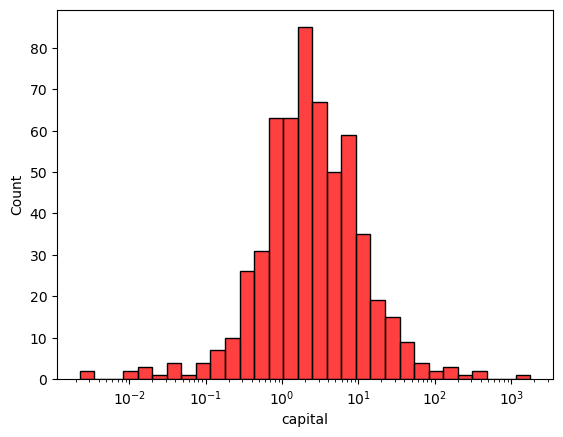

In [40]:
sns.histplot(data=df, x='capital', log_scale=True, color = "r")

<AxesSubplot:xlabel='labour', ylabel='Count'>

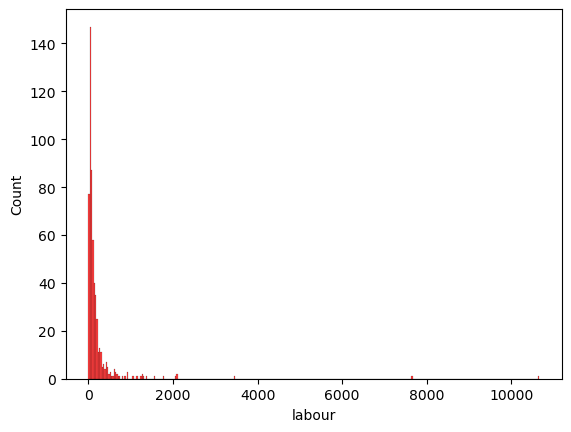

In [39]:
sns.histplot(data=df, x='labour', color = "r")

<AxesSubplot:xlabel='labour', ylabel='Count'>

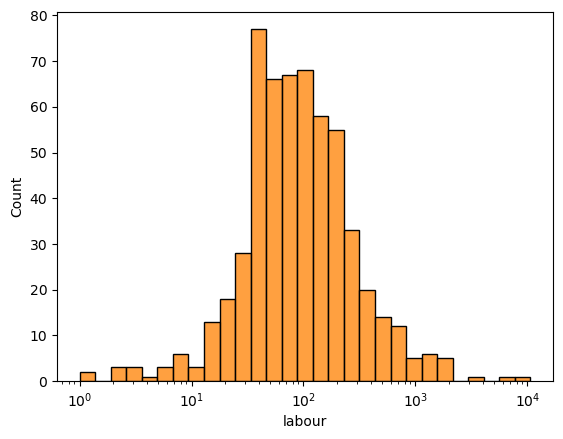

In [25]:
sns.histplot(data=df, x='labour', log_scale=True, color = "#FF8000")

# Пример 1: output vs capital

Построим диаграмму рассеяния output vs capital и вычислим параметры оптимальной прямой

<AxesSubplot:xlabel='capital', ylabel='output'>

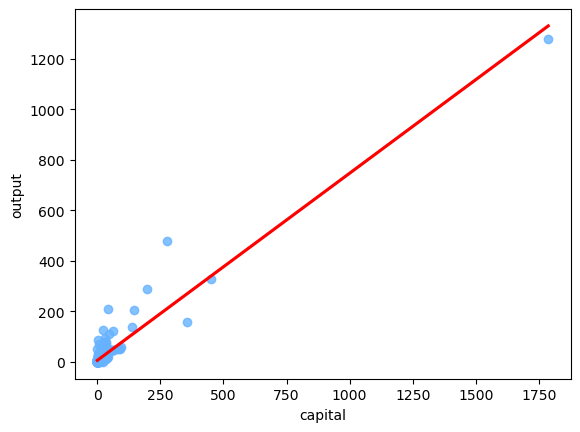

In [38]:
sns.regplot(data=df, x='capital', y='output', ci=None, line_kws={"color": "r"}, color = "#66B2FF")

In [27]:
# подгонка прямой
fitted_line = smf.ols(formula='output~capital', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept    6.19
capital      0.74
dtype: float64

Найдем параметры без константы

In [28]:
# подгонка прямой
fitted_line = smf.ols(formula='output~-1+capital', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

capital    0.75
dtype: float64

# Пример: log(output) vs log(capital)

Построим диаграмму рассеяния log(output) vs log(capital) и вычислим параметры оптимальной прямой

<AxesSubplot:xlabel='capital', ylabel='output'>

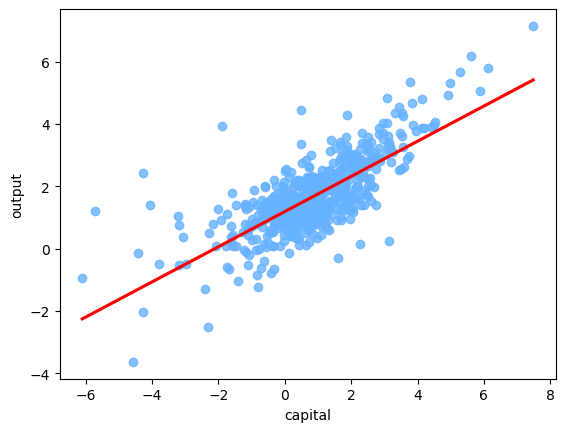

In [36]:
sns.regplot(x=np.log(df['capital']), y=np.log(df['output']), ci=None, line_kws={"color": "r"}, color = "#66B2FF")

In [31]:
# подгонка прямой
fitted_line = smf.ols(formula='np.log(output)~np.log(capital)', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept          1.19
np.log(capital)    0.56
dtype: float64

Найдем параметры без константы 

In [33]:
# подгонка прямой
fitted_line = smf.ols(formula='np.log(output)~-1+np.log(capital)', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

np.log(capital)    0.88
dtype: float64

# Пример 2: output vs labour

Построим диаграмму рассеяния output vs labour и вычислим параметры оптимальной прямой

<AxesSubplot:xlabel='labour', ylabel='output'>

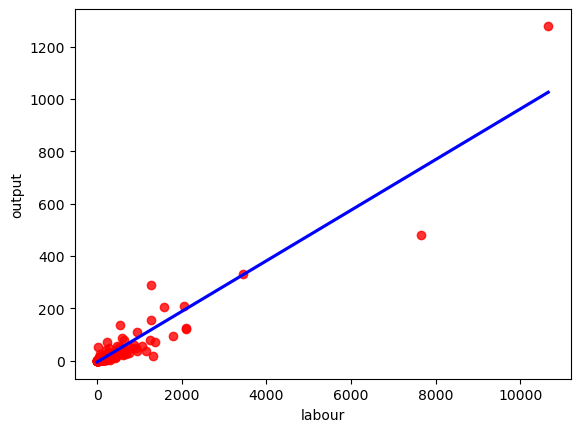

In [44]:
sns.regplot(data=df, x='labour', y='output', ci=None, line_kws={"color": "b"}, color = "r")

In [45]:
# подгонка прямой
fitted_line = smf.ols(formula='output~labour', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept   -4.72
labour       0.10
dtype: float64

Найдем параметры без константы 

In [47]:
# подгонка прямой
fitted_line = smf.ols(formula='output~-1+labour', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

labour    0.09
dtype: float64

# Пример: log(output) vs log(capital)

Построим диаграмму рассеяния log(output) vs log(capital) и вычислим параметры оптимальной прямой

<AxesSubplot:xlabel='labour', ylabel='output'>

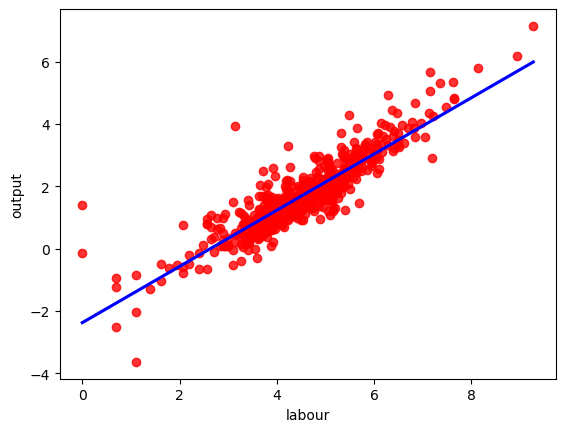

In [48]:
sns.regplot(x=np.log(df['labour']), y=np.log(df['output']), ci=None, line_kws={"color": "b"}, color = "r")

In [49]:
# подгонка прямой
fitted_line = smf.ols(formula='np.log(output)~np.log(labour)', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept        -2.38
np.log(labour)    0.90
dtype: float64

Найдем параметры без константы 

In [51]:
# подгонка прямой
fitted_line = smf.ols(formula='np.log(output)~-1+np.log(labour)', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

np.log(labour)    0.41
dtype: float64

# Пример 3: log(output) vs log(capital) & log^2(capital)

<AxesSubplot:xlabel='capital', ylabel='output'>

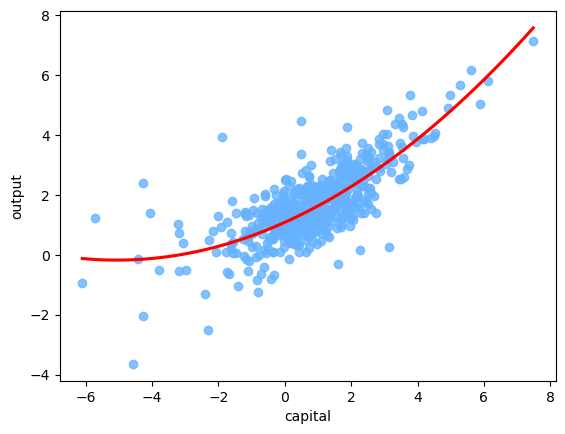

In [55]:
sns.regplot(x=np.log(df['capital']), y=np.log(df['output']), ci=None, order=2, line_kws={"color": "r"}, color = "#66B2FF")

In [53]:
# подгонка прямой
fitted_polynom = smf.ols(formula='np.log(output)~np.log(capital)+I(np.log(capital)**2)', data=df).fit()
# коэффициенты с округлением
fitted_polynom.params.round(2)

Intercept                  1.09
np.log(capital)            0.50
I(np.log(capital) ** 2)    0.05
dtype: float64

# Пример 4: log(output) vs log(labour) & log^2(labour)

<AxesSubplot:xlabel='labour', ylabel='output'>

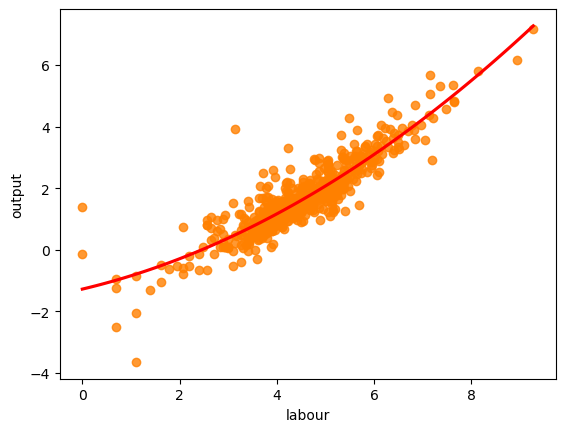

In [54]:
sns.regplot(x=np.log(df['labour']), y=np.log(df['output']), ci=None, order=2, line_kws={"color": "r"}, color = "#FF8000")

In [56]:
# подгонка прямой
fitted_polynom = smf.ols(formula='np.log(output)~np.log(labour)+I(np.log(labour)**2)', data=df).fit()
# коэффициенты с округлением
fitted_polynom.params.round(2)

Intercept                -1.28
np.log(labour)            0.37
I(np.log(labour) ** 2)    0.06
dtype: float64